In [49]:
# Import libraires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

## Q: Flood related deaths count for the whole Bangladesh over the years
We want to understand how flood related deaths is related to mean precipitation.

In [50]:
# Load dataset
df_death = pd.read_csv('Bangladesh_Death_Toll_Flooding.csv') # Data obtained from 'Our World in Data'
df_weather = pd.read_csv('concatenated_data1.csv')

### Structure of death dataset
We have 14 features, which are:
- **Entity**: The country associated with the data.                               
- **Code**: The country code.                                 
- **Year**: The year of the data.                                  
- **Total deaths - Drought**: The total number of deaths due to drought in a given year.               
- **Total deaths - Flood**: The total number of deaths due to flooding in a given year. 
- **Total deaths - Earthquake**: The total number of deaths due to earthquake in a given year. 
- **Total deaths - Extreme weather**: The total number of deaths due to extreme weather events in a given year. 
- **Total deaths - Extreme temperature**: The total number of deaths due to extreme temperature in a given year. 
- **Total deaths - Volcanic activity**: The total number of deaths due to volcanic activity in a given year. 
- **Total deaths - Landslide**: The total number of deaths due to landslides in a given year.              
- **Total deaths - Wildfire**: The total number of deaths due to wildfires in a given year.               
- **Total deaths - Glacial lake outburst**: The total number of deaths due to glacial lake outburst events in a given year.  
- **Total deaths - Dry mass movement**: The total number of deaths due to dry mass movement events in a given year.   
- **Total deaths - Fog**: The total number of deaths due to fog-related events in a given year. 

In [51]:
# First 5 rows of df_death dataset
df_death.head()

,Entity,Code,Year,Total deaths - Drought,Total deaths - Flood,Total deaths - Earthquake,Total deaths - Extreme weather,Total deaths - Extreme temperature,Total deaths - Volcanic activity,Total deaths - Landslide,Total deaths - Wildfire,Total deaths - Glacial lake outburst,Total deaths - Dry mass movement,Total deaths - Fog
0,Bangladesh,BGD,2009,0.0,16.0,NaN,197,135.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Bangladesh,BGD,1993,NaN,194.0,NaN,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangladesh,BGD,1994,NaN,116.0,NaN,205,29.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Bangladesh,BGD,1995,NaN,741.0,NaN,753,120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Bangladesh,BGD,1996,NaN,55.0,NaN,626,200.0,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# First 5 rows of df_weather dataset
df_weather.head()

,index,datetime,name,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,...,precipitation_sum,rain_sum,precipitation_hours,et0_fao_evapotranspiration,windspeed,temperature_2m_max,temperature_2m_min,apparent_temperature_max(°C),apparent_temperature_min(°C),windspeed_10m_max
0,0,17-08-2023,barisal,34.0,27.3,30.0,45.0,31.4,36.7,25.8,...,2.8,2.8,9.0,3.99,NaN,NaN,NaN,NaN,NaN,NaN
1,1,16-08-2023,barisal,34.3,27.1,30.2,45.2,30.6,37.4,26.1,...,18.3,18.3,16.0,3.37,NaN,NaN,NaN,NaN,NaN,NaN
2,2,15-08-2023,barisal,33.6,26.9,29.6,43.8,30.0,35.8,25.6,...,15.3,15.3,14.0,3.11,NaN,NaN,NaN,NaN,NaN,NaN
3,3,14-08-2023,barisal,31.9,25.1,28.3,38.0,25.1,32.3,25.2,...,22.9,22.9,16.0,3.33,NaN,NaN,NaN,NaN,NaN,NaN
4,4,13-08-2023,barisal,28.3,25.6,26.8,35.0,25.6,29.4,25.6,...,15.4,15.4,18.0,1.84,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Summary of df_death dataset
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                31 non-null     object 
 1   Code                                  31 non-null     object 
 2   Year                                  31 non-null     int64  
 3   Total deaths - Drought                1 non-null      float64
 4   Total deaths - Flood                  29 non-null     float64
 5   Total deaths - Earthquake             7 non-null      float64
 6   Total deaths - Extreme weather        31 non-null     int64  
 7   Total deaths - Extreme temperature    16 non-null     float64
 8   Total deaths - Volcanic activity      0 non-null      float64
 9   Total deaths - Landslide              6 non-null      float64
 10  Total deaths - Wildfire               0 non-null      float64
 11  Total deaths - Glacia

In [54]:
# Summary of df_death dataset
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38809 entries, 0 to 38808
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         38809 non-null  int64  
 1   datetime                      38809 non-null  object 
 2   name                          38809 non-null  object 
 3   tempmax_x                     38809 non-null  float64
 4   tempmin_x                     38809 non-null  float64
 5   temp                          38809 non-null  float64
 6   feelslikemax                  38809 non-null  float64
 7   feelslikemin                  38809 non-null  float64
 8   feelslike                     38809 non-null  float64
 9   dew                           38809 non-null  float64
 10  humidity                      38809 non-null  float64
 11  precip                        38809 non-null  float64
 12  precipprob                    38809 non-null  int64  
 13  p

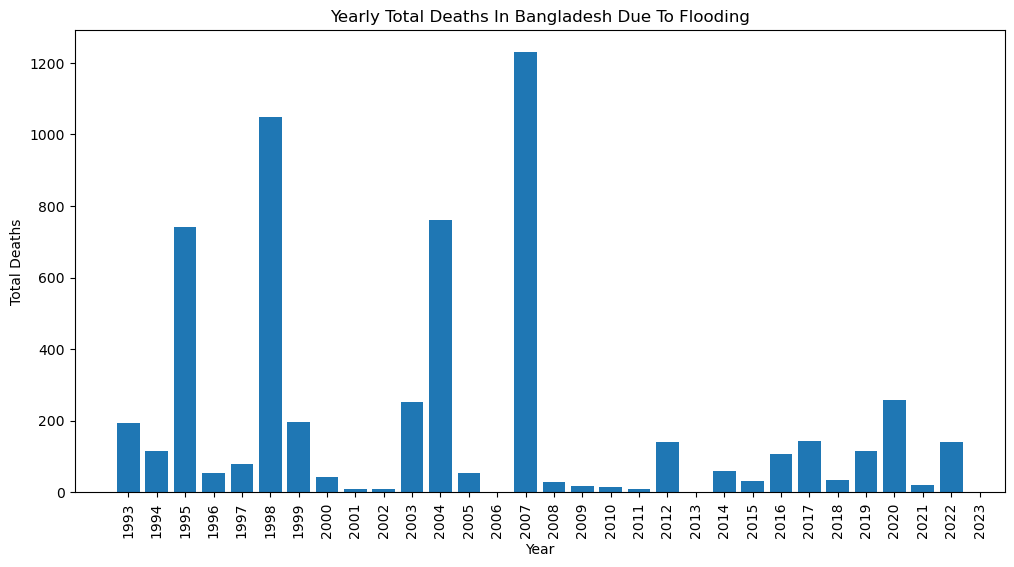

In [55]:
# Plotting the total deaths due to flooding for each year
plt.figure(figsize=(12, 6))
plt.bar(df_death["Year"], df_death["Total deaths - Flood"])

plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Yearly Total Deaths In Bangladesh Due To Flooding')
plt.xticks(df_death["Year"], rotation=90) 
plt.show()

- Between 1993 to 2022, the highest number of deaths due to flooding in Bangladesh is 2007 with 1230 deaths. Possible explanation are:
    - Monsoon Season Intensity <br>
      In 2007, the monsoon season was particularly severe, resulting in prolonged and intense rainfall.
      (https://earthobservatory.nasa.gov/images/18488/floods-in-bangladesh#:~:text=Bangladesh%27s%20annual%20monsoon%20started%20with,reported%20the%20Australian%20Broadcasting%20Corporation.)
    - Cyclone Sidr <br>
      In November 2007, Bangladesh was hit by Cyclone Sidr, one of the strongest tropical cyclones ever recorded in the Bay of Bengal. The cyclone brought about a storm surge and widespread flooding, causing extensive damage and loss of life.
  (https://www.shelterprojects.org/shelterprojects2009/ref/B.2-Bangladesh-2007-Cyclone-Sidr.pdf)
  
- Between 2012 to 2022, the highest number of deaths due to flooding in Bangladesh is 2020 with 257 deaths.

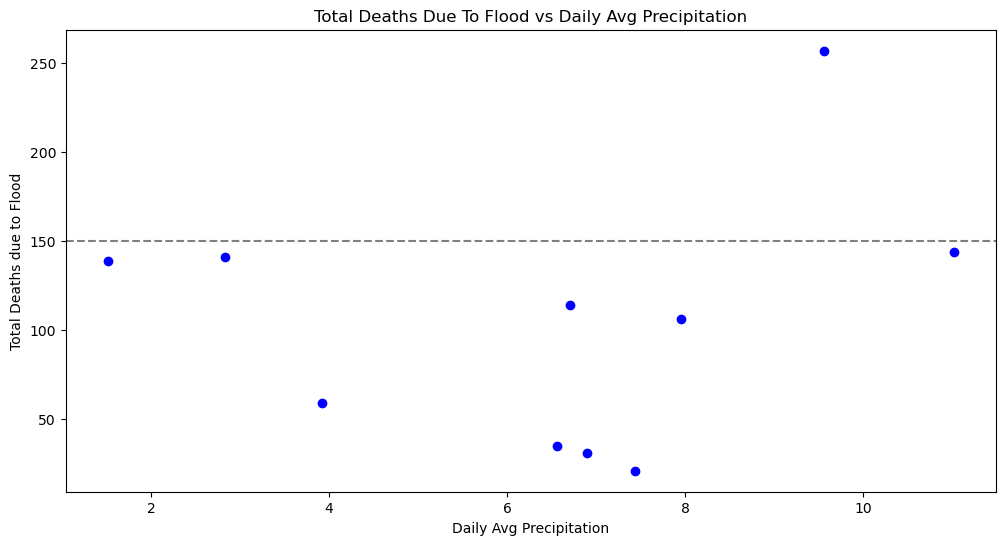

In [63]:
# Plotting the deaths due to flooding and daily avg. precipitation (Scatter Plot)

# Convert 'datetime' column to datetime format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

# Extract year from the 'datetime' column
df_weather['Year'] = df_weather['datetime'].dt.year

# Select relevant columns for visualization
df_deaths_flood = df_death[['Year', 'Total deaths - Flood']]
df_precipitation = df_weather.groupby(['Year'])['precip'].mean().reset_index()

# Merge the DataFrames on 'Year'
merged_data = pd.merge(df_deaths_flood, df_precipitation, on='Year')

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['precip'], merged_data['Total deaths - Flood'], color='blue', label='Data Points')

plt.title('Total Deaths Due To Flood vs Daily Avg Precipitation')
plt.xlabel('Daily Avg Precipitation')
plt.ylabel('Total Deaths due to Flood')

# Add a horizontal line at y=150
plt.axhline(y=150, color='gray', linestyle='--')

# Show the plot
plt.show()

- Between 2012 and 2022, most years have death counts <150 expect for 2020.

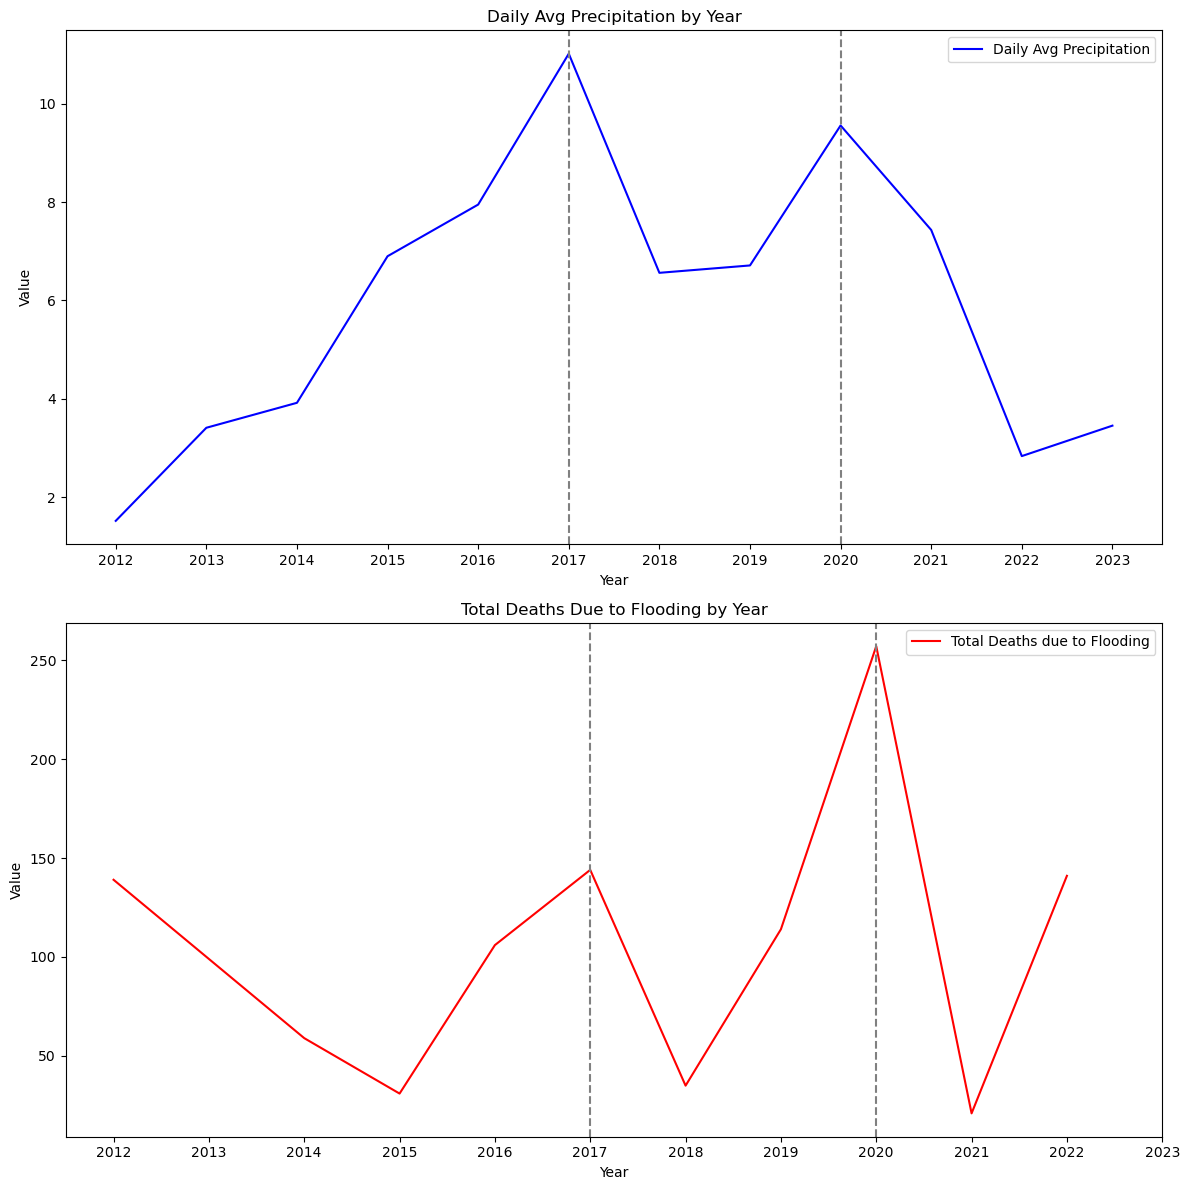

In [57]:
# Plotting the deaths due to flooding and daily avg. precipitation (Line Plot)

# Select relevant columns for visualization
df_deaths_flood = df_death[['Year', 'Total deaths - Flood']]
df_precipitation = df_weather.groupby(['Year'])['precip'].mean().reset_index()

# Merge the DataFrames on 'Year'
merged_data = pd.merge(df_deaths_flood, df_precipitation, on='Year')

# Create two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot Daily Avg Precipitation
sns.lineplot(ax=axes[0], x='Year', y='precip', data=merged_data, color='blue', label='Daily Avg Precipitation')
axes[0].set_title('Daily Avg Precipitation by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value')
axes[0].set_xticks(merged_data['Year'].unique())

# Plot Total Deaths due to Flooding
sns.lineplot(ax=axes[1], x='Year', y='Total deaths - Flood', data=merged_data, color='red', 
             label='Total Deaths due to Flooding')
axes[1].set_title('Total Deaths Due to Flooding by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value')
axes[1].set_xticks(merged_data['Year'].unique())

# Add vertical dotted lines
for ax in axes:
    ax.axvline(x=2017, color='gray', linestyle='--')
    ax.axvline(x=2020, color='gray', linestyle='--')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Missing data in 2013: No information, interpolated linearly.
- Missing data in 2023: Data is not ready yet as the year has not ended.
- In 2017 & 2020, when the daily avg. precipitation is high, the total deaths due to flooding is high.

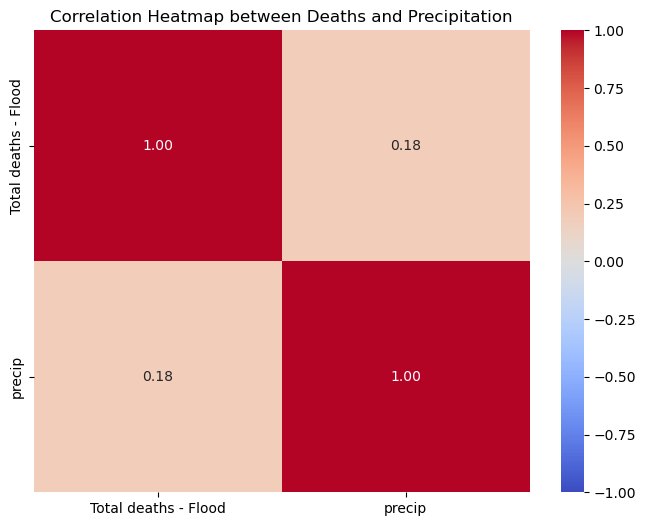

In [58]:
# Calculate the correlation matrix
merged_data = merged_data[(merged_data['Year'] != 2013) & (merged_data['Year'] != 2023)]
corr_matrix = merged_data[['Total deaths - Flood', 'precip']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Deaths and Precipitation')
plt.show()

- 'precip' & 'Total deaths - Flood' has weak postiive correlation. 
- It is expected that 'precip' & 'Total deaths - Flood' have strong correlation but the pearson correlation results show otherwise. This is possibly due to the small amount of data points (10 data only for this case).